# According to WHO, One person every 40 seconds commit suicide.

The following is an analysis of suicides across the globe. The facts driven from these analysis can be used to understand specific patterns in the dataset. They can further be used for taking relevant measures to prevent suicide rates.

Summary of this notebook/kernel:

* Suicide cases across each age group.
* Pattern of suicide cases in the past years.
* Comparision between male and female.
* Pattern of suicide cases in each generation.
* Suicide cases across each country.
* Suicides per 100k population.
* Relation between GDP and suicides.

In [68]:
#importing the necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#reading the dataset from its directory.

location = "../input/suicide-rates-overview-1985-to-2016/master.csv"
df = pd.read_csv(location)

In [70]:
#showing the first 5 rows of the dataframe. 

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [71]:
#checking if the dataset requires some cleaning (fixing trash data).

df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

Most of the columns/feature doesn't contain NaN (Not a number).

In [72]:
df = df.drop(columns="HDI for year")

In [73]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [74]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [75]:

df = df.drop(columns=' gdp_for_year ($) ')

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

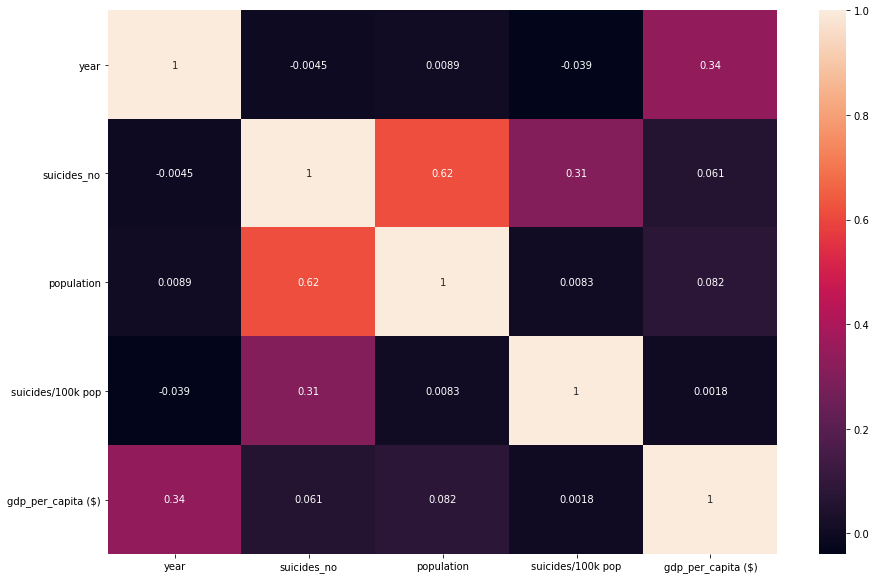

In [76]:
#Creating a heatmap of the dataset.

plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(data=cor, annot=True)
plt.yticks(rotation=0)

visualizing the relationship between the various features. 

#  Finding out the suicide_cases in each age group:

In [77]:
#Here we create a separate dataframe of "age" and "suicides_no".

data_age = df.groupby("age", as_index=False).suicides_no.sum()
data_age

,age,suicides_no
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
3,5-14 years,52264
4,55-74 years,1658443
5,75+ years,653118


Text(0.5, 1.0, 'showing the relation between age group and no of suicides cases')

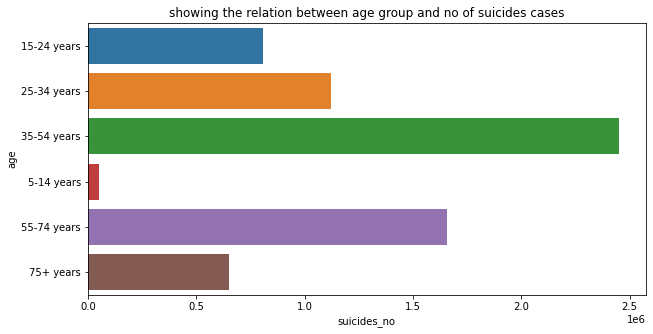

In [78]:
#Here we plot the above dataframe. 

plt.figure(figsize=(10,5))
sns.barplot(x=data_age["suicides_no"], y=data_age["age"])
plt.title("showing the relation between age group and no of suicides cases")

The age group of (35-54) has the highest number of cases.

This might be due to (marital/economic/unemployment) reasons.

# Finding out which year had the highest record of suicide cases:

In [79]:
#Firstly, we create a dataframe with the necessary features(columns) required for the operation.

data_year = df.groupby("year", as_index=False).suicides_no.sum()
data_year.head()# A total of 31 rows are there. we are showing just the first 5 rows to prevent complexcity.

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

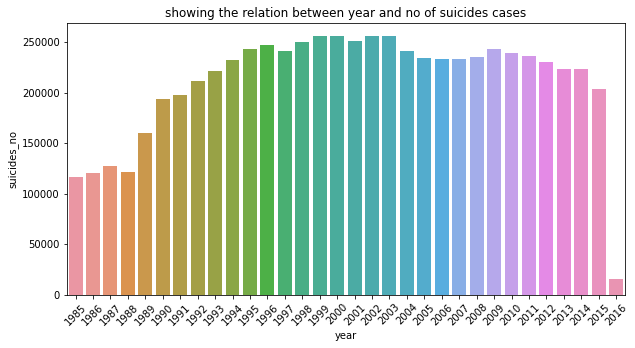

In [80]:
# now we plot the above dataframe.

plt.figure(figsize=(10,5))
sns.barplot(x=data_year["year"], y=data_year["suicides_no"])
plt.title("showing the relation between year and no of suicides cases")
plt.xticks(rotation=45)

Here we find that from 1998 to 2003 the suicide cases are highest.

This may be due to economic crisis or recessions.

2016 shows a suprising drop but that is due to missing values in the dateset.

In [81]:
# Here we cross-checked the data of 2016.
a = df[df['year']==2016]
a.describe

<bound method NDFrame.describe of         country  year     sex          age  suicides_no  population  \
1248    Armenia  2016    male    75+ years           12       61956   
1249    Armenia  2016    male  55-74 years           16      237813   
1250    Armenia  2016    male  35-54 years           16      350633   
1251    Armenia  2016    male  15-24 years            5      202220   
1252    Armenia  2016  female    75+ years            2      102414   
...         ...   ...     ...          ...          ...         ...   
25307  Thailand  2016  female    75+ years           69     1589015   
25308  Thailand  2016  female  55-74 years          222     6049756   
25309  Thailand  2016  female  35-54 years          375    10629684   
25310  Thailand  2016  female  25-34 years          116     4702656   
25311  Thailand  2016  female  15-24 years           60     4525574   

       suicides/100k pop  country-year  gdp_per_capita ($)    generation  
1248               19.37   Armenia2016

Here we find just 160 rows for the year 2016.(unlike for year 2000 with 10000 rows)

So, there are clearly some missing values.

# Finding out which gender is more likely to commit suicide based on the historical data:

In [82]:
data_gender = df.groupby("sex", as_index=False).suicides_no.sum()
data_gender

,sex,suicides_no
0,female,1559510
1,male,5188910


Text(0.5, 1.0, 'Relation between gender and no of suicide cases')

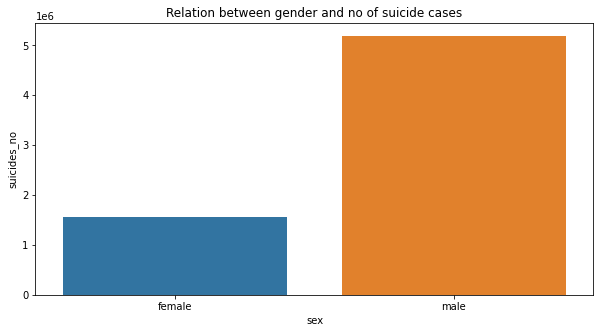

In [83]:
# To visualize the above data we use barplot.

plt.figure(figsize=(10,5))
sns.barplot(x=data_gender["sex"], y=data_gender["suicides_no"])
plt.title("Relation between gender and no of suicide cases")

Male suicide cases are 3 times that of female cases.

# Finding out the relation between generation and no of suicide cases.

In [84]:
# Creating a dataframe of generation and suicides_no.
data_gen = df.groupby("generation", as_index=False).suicides_no.sum()
data_gen

,generation,suicides_no
0,Boomers,2284498
1,G.I. Generation,510009
2,Generation X,1532804
3,Generation Z,15906
4,Millenials,623459
5,Silent,1781744


Text(0.5, 1.0, 'No of Suicide cases in each generation.')

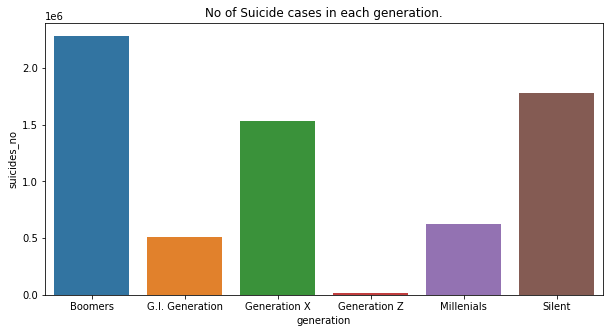

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x=data_gen["generation"], y=data_gen["suicides_no"])
plt.title("No of Suicide cases in each generation.")

The Boomers generation commited the most suicides.(Generation range=1946-1964)

Generation Z commited the least suicide.(Generation range=1992-2010)

# Finding out which country has the highest suicide cases.

In [86]:
# we create a dataframe with the necessary features.
data_country = df.groupby("country", as_index=False).suicides_no.sum()
data_country

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101
...,...,...
96,United Arab Emirates,622
97,United Kingdom,136805
98,United States,1034013
99,Uruguay,13138


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

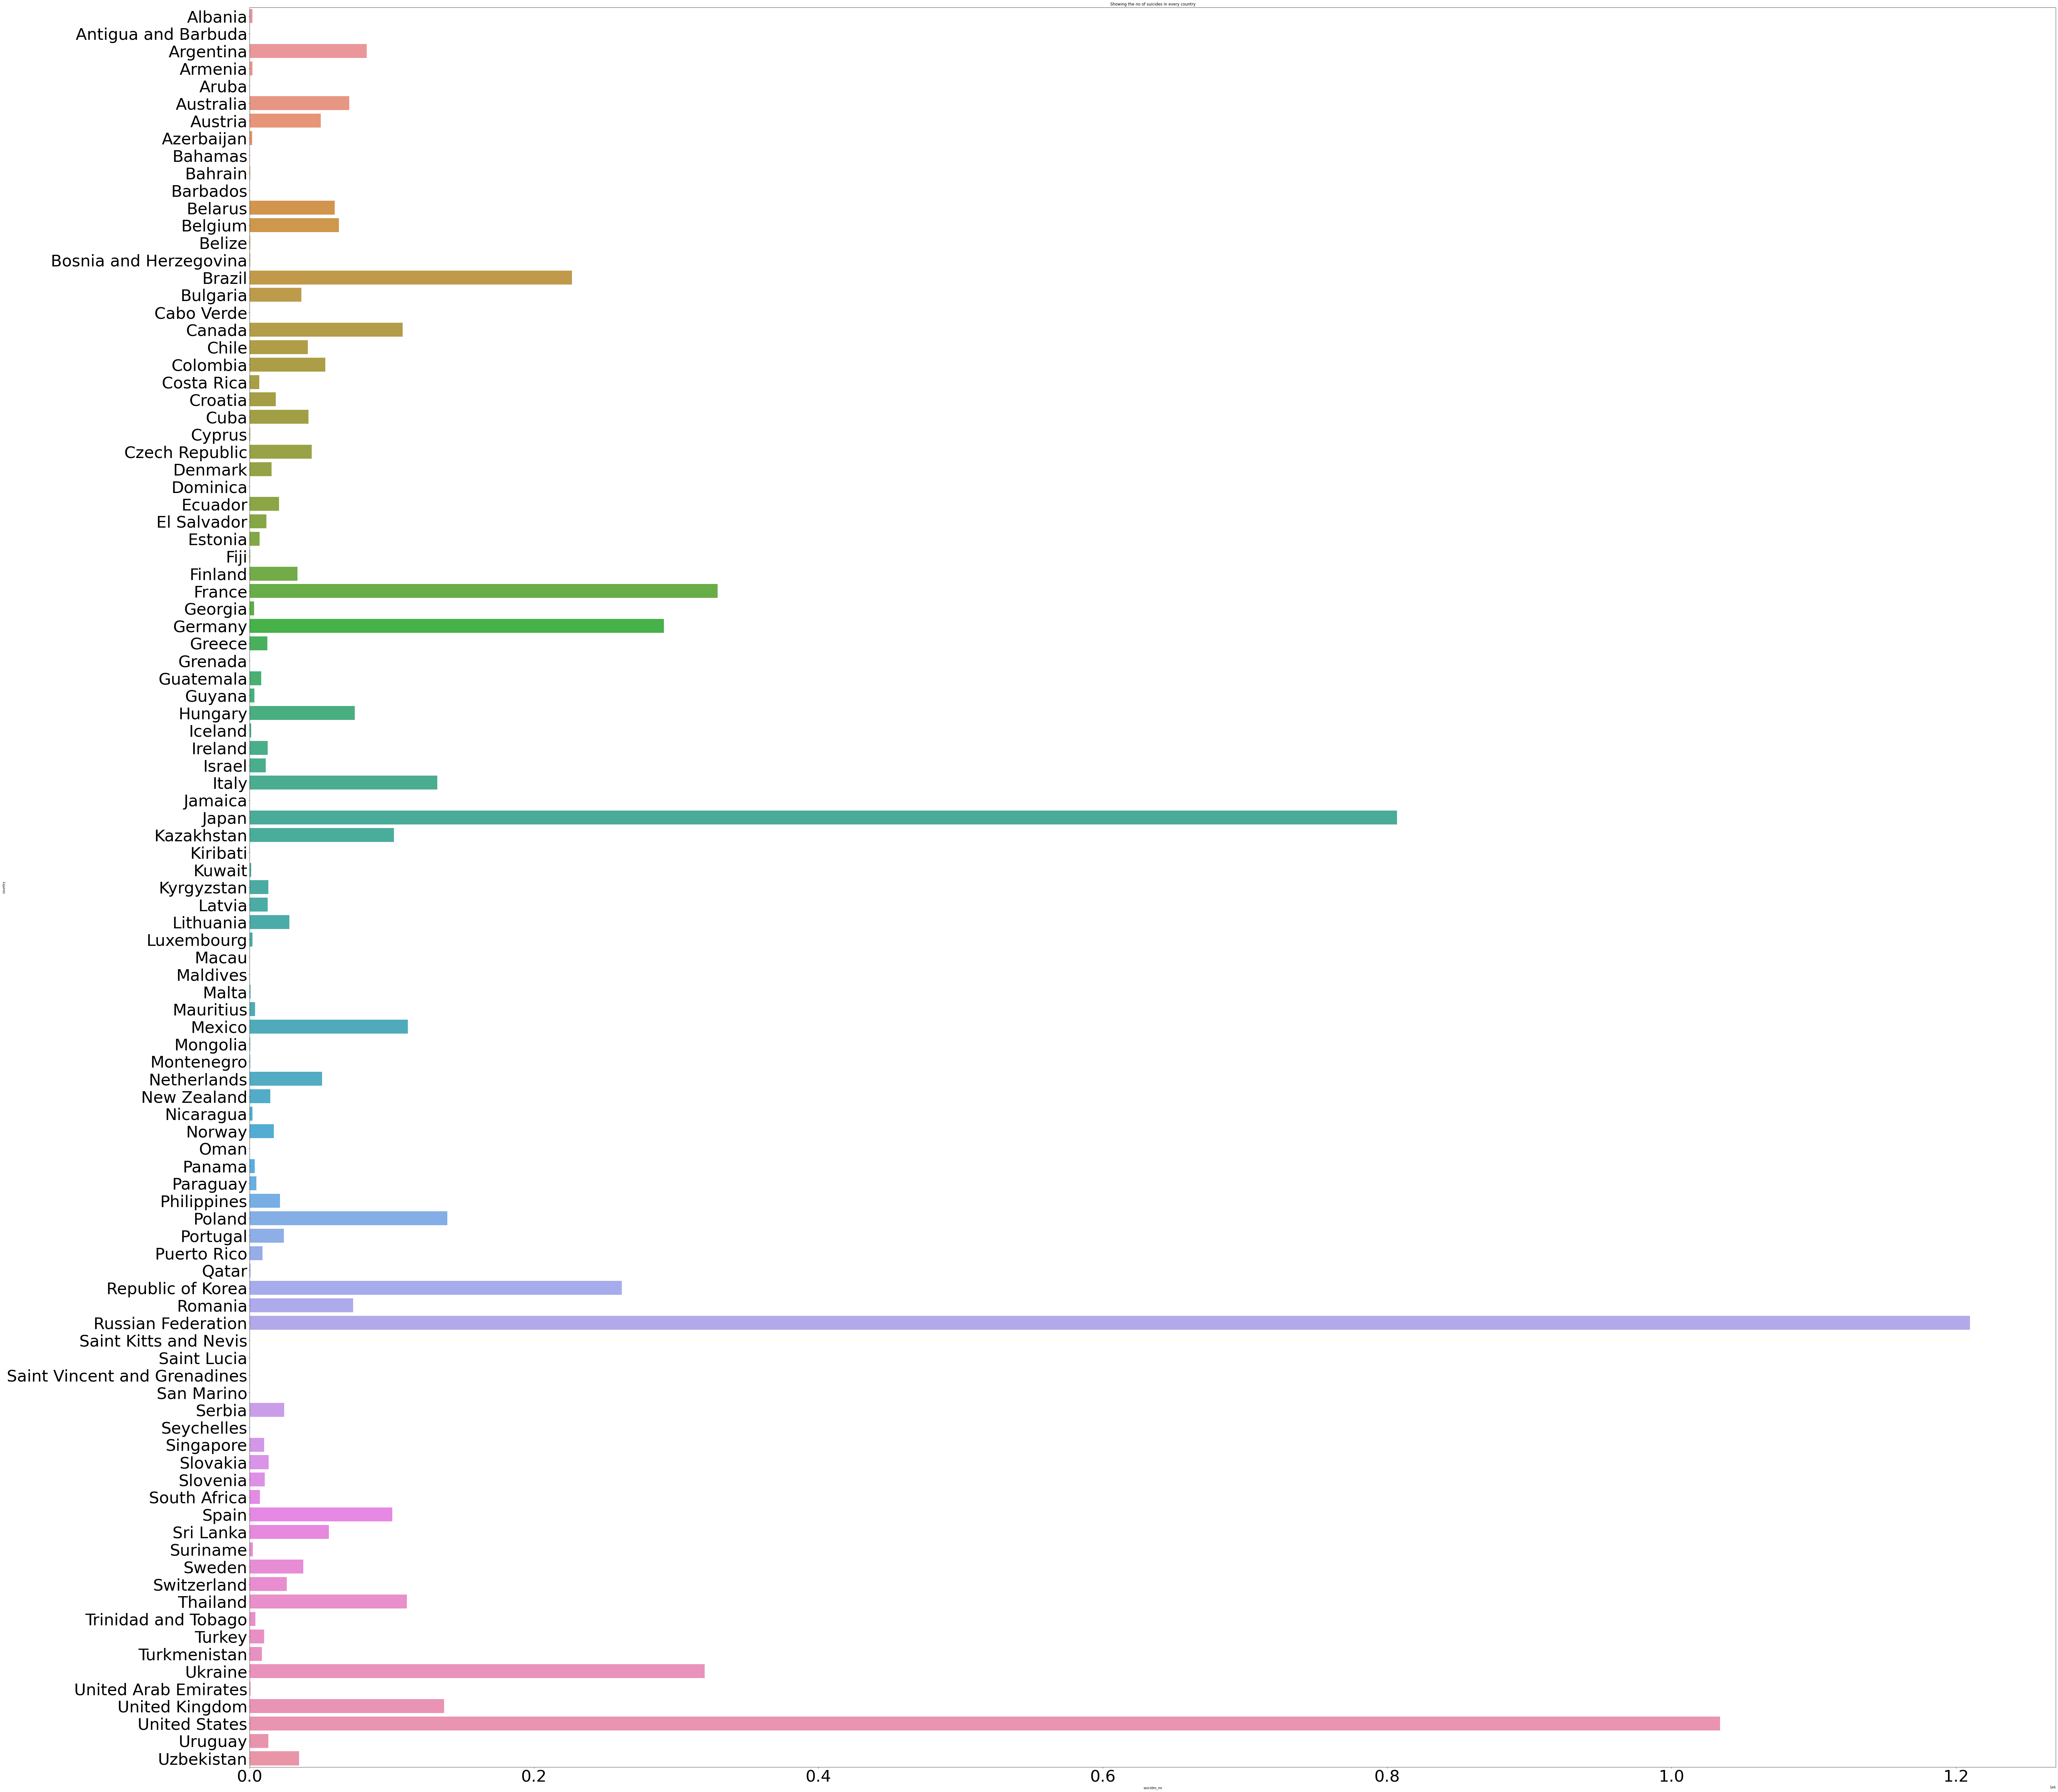

In [87]:
# To make things easy, we plot the above values in a bargraph.
plt.figure(figsize=(100,100))
sns.barplot(x=data_country["suicides_no"], y=data_country["country"])
plt.title("Showing the no of suicides in every country")
plt.xticks(size = 50)
plt.yticks(size = 50)
#plt.xticks(rotation=80)

The above representation shows that the russian federation had the highest number of suicide cases.
Followed by US and Japan.

# Again cross-checking the suicide rates/100k in every country.

In [88]:
data_rate = df.groupby("country", as_index=False)["suicides/100k pop"].mean()
data_rate

,country,suicides/100k pop
0,Albania,3.502879
1,Antigua and Barbuda,0.552901
2,Argentina,10.469328
3,Armenia,3.275872
4,Aruba,9.503095
...,...,...
96,United Arab Emirates,1.317917
97,United Kingdom,7.502473
98,United States,13.819812
99,Uruguay,19.461190


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

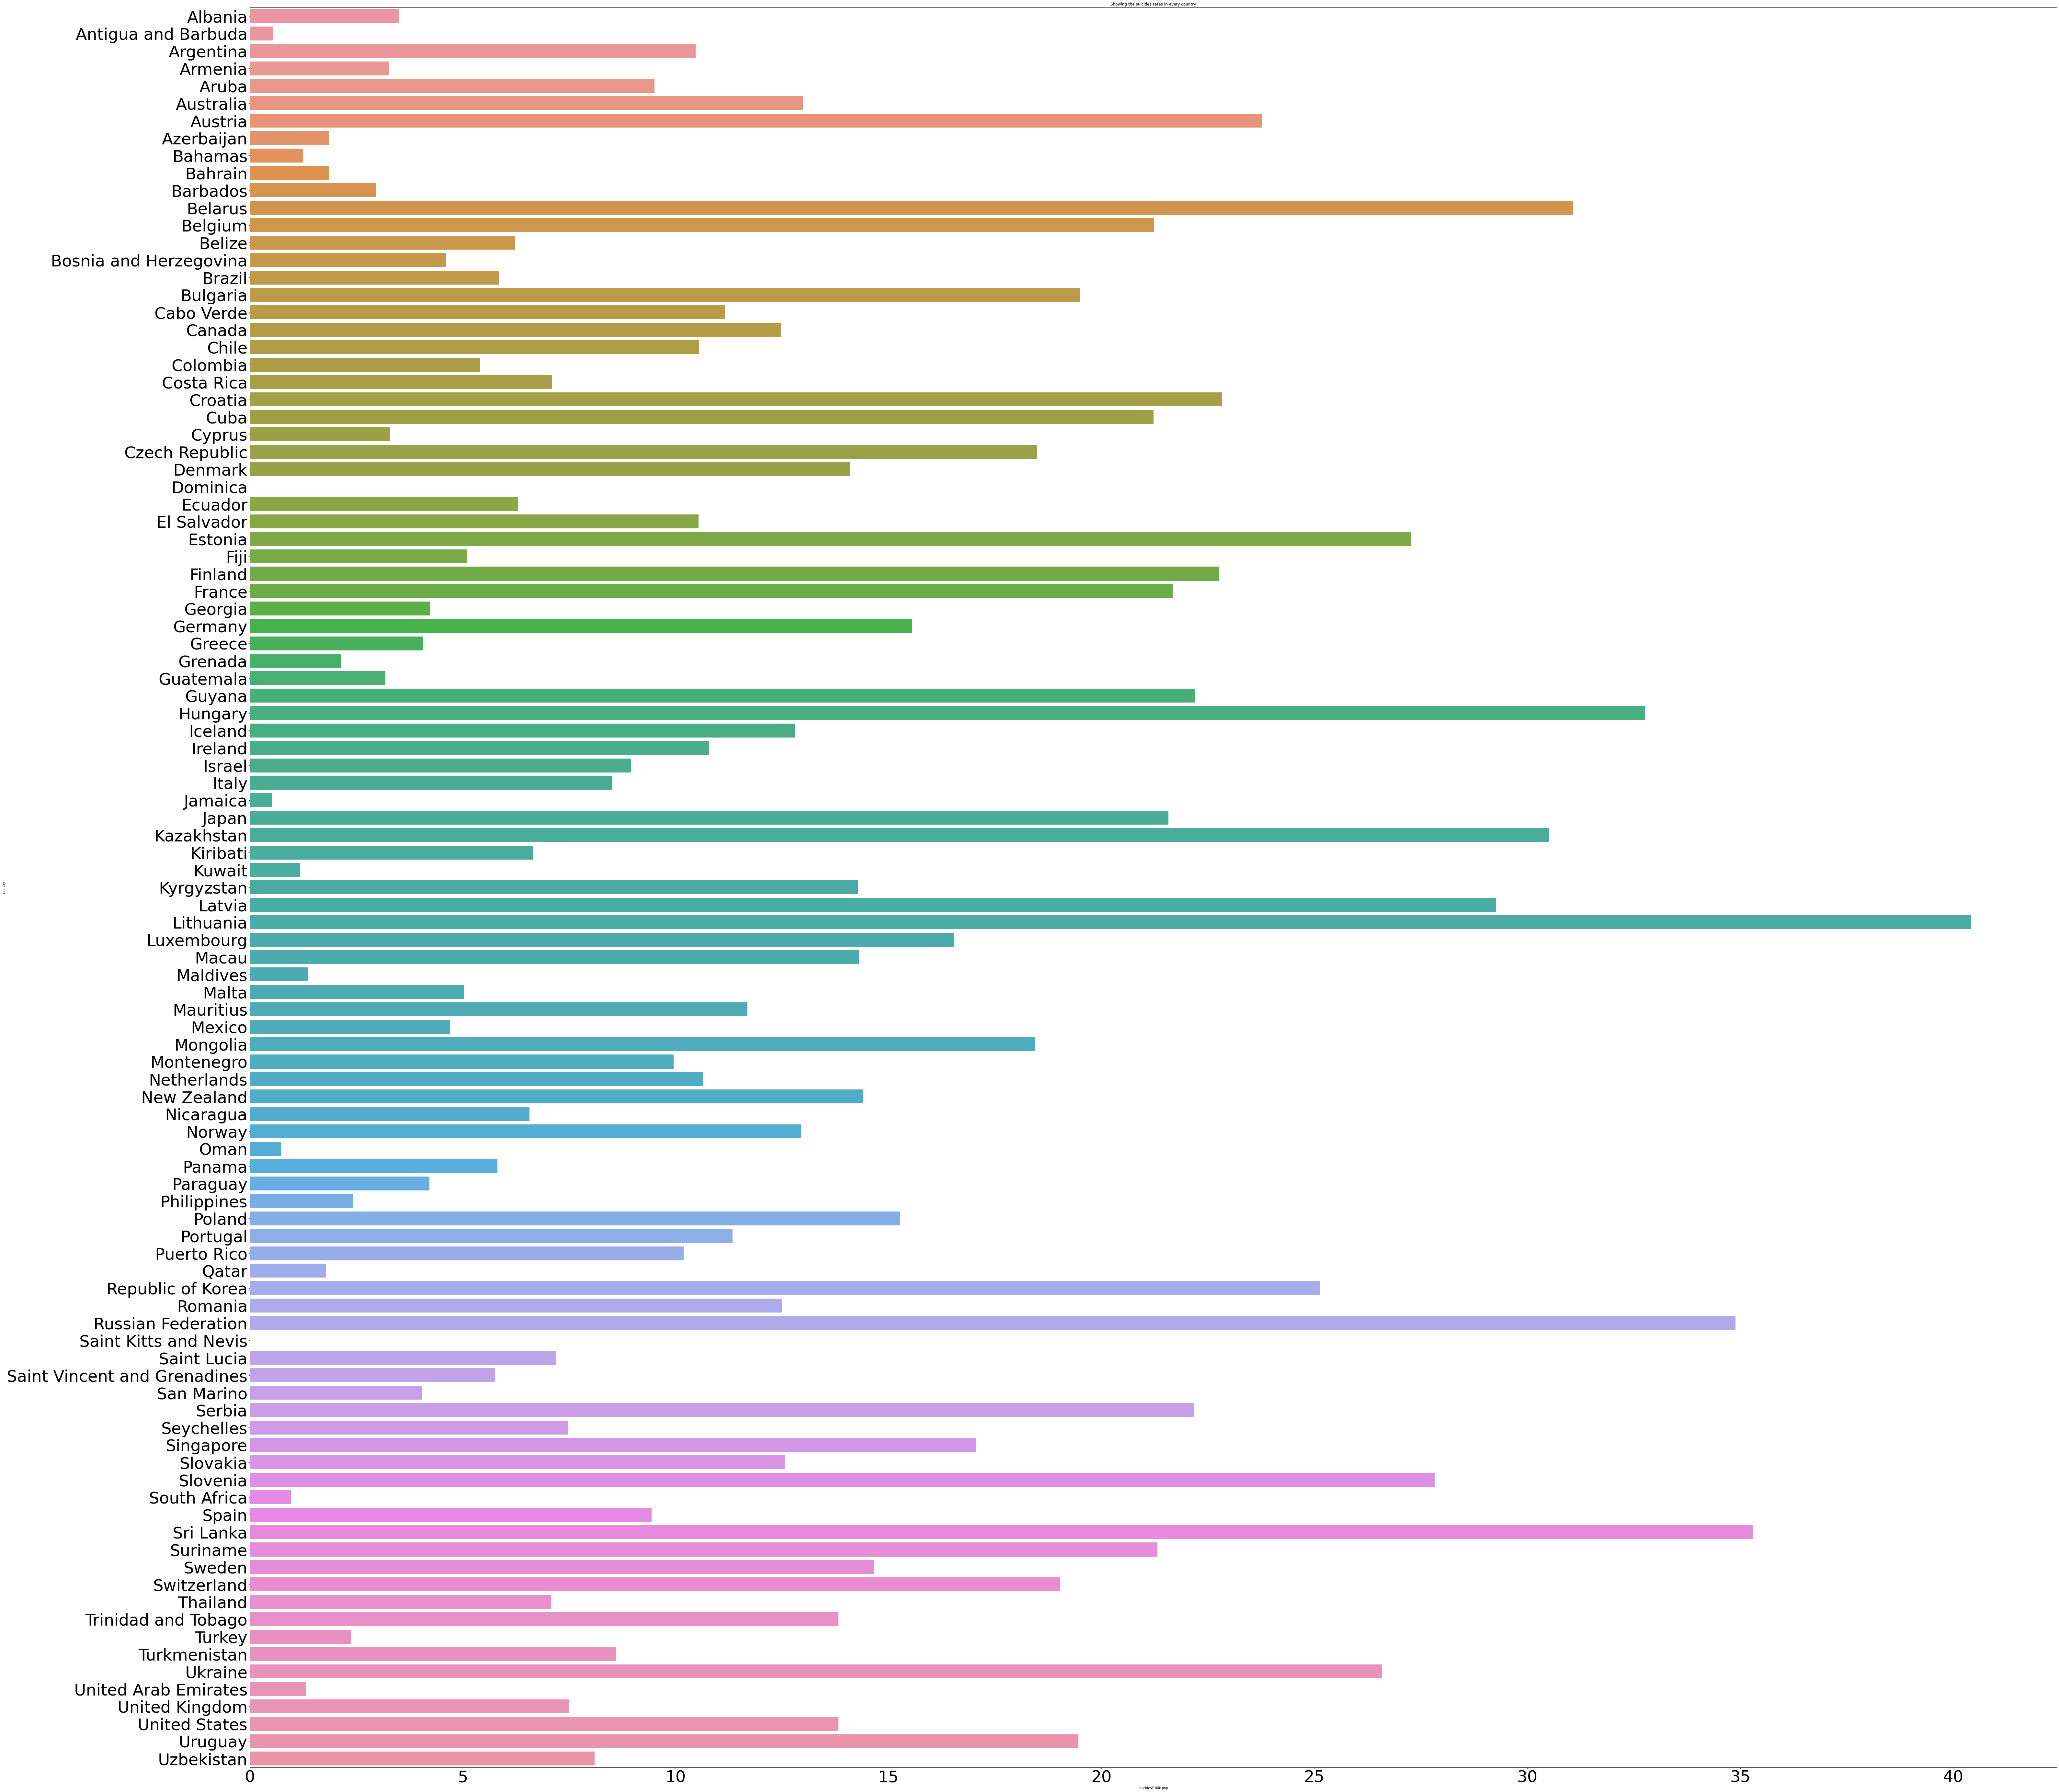

In [89]:
# To make things easy, we plot the above values in a bargraph.
plt.figure(figsize=(100,100))
sns.barplot(x=data_rate["suicides/100k pop"], y=data_country["country"])
plt.title("Showing the suicides rates in every country")
plt.xticks(size = 50)
plt.yticks(size = 50)

So, according to this data analysis, we find the countries with the most suicide cases/100k population.

Lithunia seems to have the highest suicide rate. Followed by Russian Federation and Sri lanka.

Basically, this pictorial representation (ratio) shows which countries were mostly affected by suicides rate.


# Relation between GDP per capita and no of suicide cases

In [90]:
# creating a dataframe.

data_gdp=df.groupby("country", as_index=False)["gdp_per_capita ($)"].mean()
data_gdp

,country,gdp_per_capita ($)
0,Albania,1859.045455
1,Antigua and Barbuda,10448.185185
2,Argentina,7914.096774
3,Armenia,1873.919463
4,Aruba,24221.642857
...,...,...
96,United Arab Emirates,42162.000000
97,United Kingdom,31908.354839
98,United States,39269.612903
99,Uruguay,7622.071429


In [91]:
data_s=df.groupby("country", as_index=False)["suicides_no"].sum()
data_s

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101
...,...,...
96,United Arab Emirates,622
97,United Kingdom,136805
98,United States,1034013
99,Uruguay,13138


In [92]:
#data_gdp.append(data_s, ignore_index=True)
concat_df = pd.concat([data_gdp, data_s], axis=1)
concat_df

,country,gdp_per_capita ($),country,suicides_no
0,Albania,1859.045455,Albania,1970
1,Antigua and Barbuda,10448.185185,Antigua and Barbuda,11
2,Argentina,7914.096774,Argentina,82219
3,Armenia,1873.919463,Armenia,1905
4,Aruba,24221.642857,Aruba,101
...,...,...,...,...
96,United Arab Emirates,42162.000000,United Arab Emirates,622
97,United Kingdom,31908.354839,United Kingdom,136805
98,United States,39269.612903,United States,1034013
99,Uruguay,7622.071429,Uruguay,13138


Text(0.5, 1.0, 'Relation between GDP per capita and no of suicide cases')

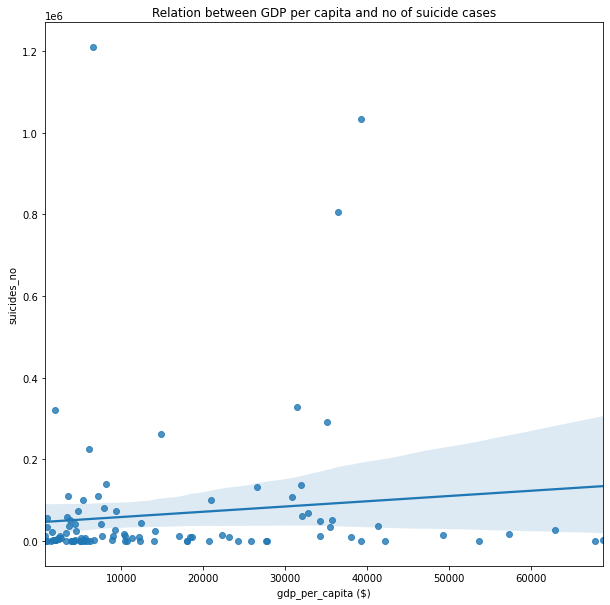

In [93]:
plt.figure(figsize=(10,10))
sns.regplot(x=concat_df["gdp_per_capita ($)"], y=concat_df["suicides_no"]) 
plt.title("Relation between GDP per capita and no of suicide cases")

From this pictorial representation we find there is a slight increase in suicide cases with the increase in gdp per capita.